# - Question

#### &nbsp;&nbsp;&nbsp;&nbsp; -- What are the most common dog names?
#### &nbsp;&nbsp;&nbsp;&nbsp; -- What are the most common dog breeds?
#### &nbsp;&nbsp;&nbsp;&nbsp; -- What are the most favourite,  retweeted dog breeds by average?
#### &nbsp;&nbsp;&nbsp;&nbsp; -- What are the most favourite,  retweeted dog stage by average?



# - Wrangling

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
% matplotlib inline

##  -- Gathering

In [2]:
# Reading tweets archive
tweet_archive = pd.read_csv("twitter-archive-enhanced.csv")
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [3]:
#Getting tweets details from json
tweet_json = pd.read_json("tweet-json.txt", lines=True)

In [4]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [5]:
# Saving image predictions as local file
download = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open("image-predictions.tsv", "wb") as file:
    file.write(download.content)

In [6]:
#Reading image preduction
image_pred = pd.read_csv("image-predictions.tsv", sep="\t")
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## -- Assessing

In [7]:
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
tweet_json.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


In [12]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
# Most of tweets got rating > 10, inspecting tweets with rating < 10 to check if the rating was extracted incorrectly
pd.options.display.max_colwidth = 140
tweet_archive[tweet_archive.rating_numerator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me ba...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://...",0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet http...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313023332352/photo/1,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https:/...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541936185344/photo/1,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t....,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.

## -- Cleaning

### --- Define
Quality:

1- `tweet_json` id column name is `id` while in other tables named `tweet_id`

2- Convert `rating_numerator` column to float as some ratings contains decimals

3- `tweet_archive` id 883482846933004288 has 5/10 while it should be 13.5/10

4- `tweet_archive` id 848212111729840128 is a goat not a dog

5- `tweet_archive` id 835152434251116546 0 score based on stolen tweet and 746906459439529985 on city top view

6- `tweet_archive` id 749981277374128128 rate is 1776 based on the year of declaration of independence

7- `tweet_archive`  id 670842764863651840 and 855862651834028034 rate is 420/10 based on snoop dog not an actual dog

8- `tweet_archive` some retweets (starts with RT @)

9- `tweet_archive` some tweets missing images

10- `tweet_archive` timestamp not datetime format

11- `tweet_archive` some records are missing dog stage

12- Not all `rating_denominator` are 0-10 rating

13- Some dog names extracted as `a` and `the`



Tidiness:

1- Tweets favourites and retweet counts should be extracted from `tweet_json` and merged with `tweet_archive`

2- `tweet_archive` Dog stage in 4 separate columns

3- Dog breed should be extracted from `image_pred` and merged with `tweet_archive`

### --- Code

In [14]:
# Creating copies of original dataframes
tweet_archive_clean = tweet_archive.copy()
tweet_json_clean = tweet_json.copy()
image_pred_clean = image_pred.copy()

In [15]:
# Extracting favourites and retweets for original tweets only (no retweets or replies)
fav_like = tweet_json_clean[["id", "favorite_count", "retweet_count"]][tweet_json_clean["in_reply_to_status_id"].isnull()]
fav_like.columns = ["tweet_id", "favorite_count", "retweet_count"]

# Merging fav_like to tweet_archive
tweet_archive_clean = pd.merge(tweet_archive, fav_like, on='tweet_id', how='outer')

# Removing retweets by checking favorites null values resulted from merging with original tweets
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.favorite_count.notnull()]

# Removing tweets with no image
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.expanded_urls.notnull()]

# Converting favorite_count, retweet_count from float to int
tweet_archive_clean.favorite_count = tweet_archive_clean.favorite_count.astype(int)
tweet_archive_clean.retweet_count = tweet_archive_clean.retweet_count.astype(int)


## --Test

In [16]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2272 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2272 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2272 non-null object
source                        2272 non-null object
text                          2272 non-null object
retweeted_status_id           178 non-null float64
retweeted_status_user_id      178 non-null float64
retweeted_status_timestamp    178 non-null object
expanded_urls                 2272 non-null object
rating_numerator              2272 non-null int64
rating_denominator            2272 non-null int64
name                          2272 non-null object
doggo                         2272 non-null object
floofer                       2272 non-null object
pupper                        2272 non-null object
puppo                         2272 non-null object
favorite_count                2272

## -- Code

In [57]:
tweet_archive_clean.timestamp = pd.to_datetime(tweet_archive_clean.timestamp)

## -- Test

In [58]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2093
Data columns (total 17 columns):
tweet_id                      2091 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2091 non-null datetime64[ns]
source                        2091 non-null object
text                          2091 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2091 non-null object
rating_numerator              2090 non-null float64
rating_denominator            2091 non-null int64
name                          1110 non-null object
favorite_count                2091 non-null int64
retweet_count                 2091 non-null int64
stage                         335 non-null object
breed                         1665 non-null object
dtypes: datetime64[ns](1), float6

### --- Code

In [17]:
# correcting numerator rating values
tweet_archive_clean["text"].str.extract(r'(\d{1,}\.?\d*?\/\d*)')[0].str.split('/')

0       [13, 10]
1       [13, 10]
2       [12, 10]
3       [13, 10]
4       [12, 10]
5       [13, 10]
6       [13, 10]
7       [13, 10]
8       [13, 10]
9       [14, 10]
10      [13, 10]
11      [13, 10]
12      [13, 10]
13      [12, 10]
14      [13, 10]
15      [13, 10]
16      [12, 10]
17      [13, 10]
18      [13, 10]
20      [12, 10]
21      [13, 10]
22      [14, 10]
23      [13, 10]
24      [13, 10]
25      [12, 10]
26      [13, 10]
27      [13, 10]
28      [13, 10]
29      [12, 10]
31      [13, 10]
          ...   
2326     [2, 10]
2327     [7, 10]
2328     [9, 10]
2329    [11, 10]
2330     [6, 10]
2331     [8, 10]
2332    [10, 10]
2333     [9, 10]
2334     [3, 10]
2335      [1, 2]
2336    [11, 10]
2337    [10, 10]
2338     [1, 10]
2339    [11, 10]
2340     [8, 10]
2341     [9, 10]
2342     [6, 10]
2343    [10, 10]
2344     [9, 10]
2345    [10, 10]
2346     [8, 10]
2347     [9, 10]
2348    [10, 10]
2349     [2, 10]
2350    [10, 10]
2351     [5, 10]
2352     [6, 10]
2353     [9, 1

In [18]:
# correcting numerator rating values
tweet_archive_clean["rating_numerator"], tweet_archive_clean["rating_denominator"] = tweet_archive_clean["text"].str.extract(r'(\d{1,}\.?\d*?\/\d{2,})')[0].str.split('/').str

#Convering `rating_numerator` to float
tweet_archive_clean.rating_numerator = tweet_archive_clean.rating_numerator.astype(float)
tweet_archive_clean.rating_denominator = tweet_archive_clean.rating_denominator.astype(float)


## --Test

In [19]:
tweet_archive_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,None,None,None,None,None,111,41
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,a,None,None,None,None,311,147
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,a,None,None,None,None,128,47
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,a,None,None,None,None,132,48
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,None,None,None,None,None,2535,532


### --- Code

In [20]:
#Checking for retweets by (RT @)
tweet_archive_clean["text"].str.contains(r'(RT @)').sum()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


178

In [21]:
#Dropping retweets by RT @
tweet_archive_clean.drop(tweet_archive_clean[tweet_archive_clean["text"].str.contains(r'(RT @)')].index, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


## --Test

In [22]:
#Rechecking for retweets by RT @
tweet_archive_clean["text"].str.contains(r'(RT @)').sum()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


0

In [23]:
tweet_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWe...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None,41048,9774
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,None,None,None,None,20562,3261
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4h...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,None,None,None,None,12041,2158
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nO...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,None,None,None,None,None,56848,16716
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,1

### --- Code

In [24]:
#Melting 4 stages columns to 1 column 
#tweet_archive_clean = pd.melt(tweet_archive_clean, id_vars=["tweet_id", "in_reply_to_status_id", "in_reply_to_user_id", "timestamp", "source", "text", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls", "rating_numerator", "rating_denominator", "name", "favorite_count", "retweet_count"],  value_name="stage")
#tweet_archive_clean.drop("variable", axis= 1, inplace=True)

# Creating list with dog stages
dog_stages = ["doggo", "floofer", "pupper", "puppo"]
# Creating new column "stage" filling it with NaN
tweet_archive_clean["stage"] = np.nan

# Looping throw each stage
for stage in dog_stages:
    # Creating a mask of filled rows (not "None")
    mask = (tweet_archive_clean[stage] != "None")
    # Updating "stage" column with the stage value
    tweet_archive_clean["stage"][mask] = stage

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## --Test

In [25]:
tweet_archive_clean[tweet_archive_clean["stage"].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10.0,Cassie,doggo,None,None,None,32467,7711,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13.0,10.0,None,None,None,None,puppo,38818,8538,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13.0,10.0,Stuart,None,None,None,puppo,15359,2321,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe http...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/886366144734445568/photo/1,https://twitter.com/dog_rates/status/886366144734445568/photo/1",12.0,10.0,Roscoe,None,None,pupper,None,21524,3316,pupper
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12.0,10.0,Yogi,doggo,None,None,None,20771,3128,doggo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13.0,10.0,Grizzwald,None,floofer,None,None,22986,3825,floofer
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694511734784/photo/1,12.0,10.0,Gus,None,None,pupper,None,28903,5134,pupper
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14.0,10.0,a,None,None,pupper,None,50199,16570,pupper
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/87877609342308761

### --- Code

In [26]:
# Dropping 4 stages columns
tweet_archive_clean = tweet_archive_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1)

## --Test

In [27]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null object
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2093 non-null float64
rating_denominator            2093 non-null float64
name                          2094 non-null object
favorite_count                2094 non-null int64
retweet_count                 2094 non-null int64
stage                         335 non-null object
dtypes: float64(6), int64(3), object(7)
memory usage: 278.1+ KB


### --- Code

In [28]:
# Creating new column for breed
image_pred_clean["breed"] = np.nan

# Selecting recognized breeds by algorithm #1 and copying the value to column breed
mask_p1 = (image_pred_clean.p1_dog == True)
image_pred_clean["breed"][mask_p1] = image_pred_clean[mask_p1]["p1"]

# Selecting breeds unrecognized by algorithm #1 and were recognized by second most likley algorithm #2 
# and copying the value to column breed
mask_p2 = ((image_pred_clean.p1_dog == False) & (image_pred_clean.p2_dog == True))
image_pred_clean["breed"][mask_p2] = image_pred_clean[mask_p2]["p2"]

# Selecting breeds unrecognized by algorithm #1 & #2 and were recognized by Third most likley algorithm #3
# and copying the value to column breed
mask_p3 = ((image_pred_clean.p1_dog == False) & (image_pred_clean.p2_dog == False) & (image_pred_clean.p3_dog == True))
image_pred_clean["breed"][mask_p3] = image_pred_clean[mask_p3]["p3"]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


## --Test

In [29]:
image_pred_clean.breed.value_counts()

golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
cocker_spaniel                     34
malamute                           34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Eskimo_dog                         22
Staffordshire_bullterrier          22
German_shepherd                    21
beagle                             21
Siberian_husky                     20
Shih-Tzu                           20
Maltese_dog                        19
Shetland_sheepdog                  19
Lakeland_terrier                   19
kuvasz                             19
Rottweiler                         19
Italian_grey

### --- Code

In [30]:
# Merging detected breed 
detected = image_pred_clean[["tweet_id", "breed"]]
tweet_archive_clean = pd.merge(tweet_archive_clean, detected, on="tweet_id", how="left")

## --Test

In [31]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null object
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2093 non-null float64
rating_denominator            2093 non-null float64
name                          2094 non-null object
favorite_count                2094 non-null int64
retweet_count                 2094 non-null int64
stage                         335 non-null object
breed                         1666 non-null object
dtypes: float64(6), int64(3), object(8)

### --- Code

In [32]:
# Checking ratings denominator
tweet_archive_clean.rating_denominator.value_counts()

10.0     2078
50.0        3
80.0        2
11.0        2
150.0       1
110.0       1
90.0        1
70.0        1
170.0       1
120.0       1
40.0        1
20.0        1
Name: rating_denominator, dtype: int64

In [33]:
# Recalculating ratings on base 10
tweet_archive_clean.rating_numerator = 10 / tweet_archive_clean.rating_denominator * tweet_archive_clean.rating_numerator
tweet_archive_clean.rating_denominator = 10

## --Test

In [34]:
tweet_archive_clean.rating_numerator.value_counts()

12.000000      489
10.000000      436
11.000000      418
13.000000      287
9.000000       154
8.000000        98
7.000000        51
14.000000       38
5.000000        33
6.000000        32
3.000000        19
4.000000        15
2.000000        10
1.000000         4
9.750000         1
13.500000        1
420.000000       1
11.260000        1
8.181818         1
0.000000         1
6.363636         1
11.270000        1
1776.000000      1
Name: rating_numerator, dtype: int64

### --- Code

In [35]:
# Removing outlines in quality issues #5,6,7
tweet_archive_clean.drop(tweet_archive_clean[(tweet_archive_clean.rating_numerator == 0)].index, inplace=True)
tweet_archive_clean.drop(tweet_archive_clean[(tweet_archive_clean.rating_numerator == 420)].index, inplace=True)
tweet_archive_clean.drop(tweet_archive_clean[(tweet_archive_clean.rating_numerator == 1776)].index, inplace=True)


## --Test

In [36]:
tweet_archive_clean.rating_numerator.value_counts()

12.000000    489
10.000000    436
11.000000    418
13.000000    287
9.000000     154
8.000000      98
7.000000      51
14.000000     38
5.000000      33
6.000000      32
3.000000      19
4.000000      15
2.000000      10
1.000000       4
9.750000       1
11.260000      1
11.270000      1
13.500000      1
8.181818       1
6.363636       1
Name: rating_numerator, dtype: int64

### --- Code

In [37]:
# Extracting dog names
tweet_archive_clean.name = tweet_archive_clean.text.str.extract(r'(is [A-Z][a-z]*)')[0].str.replace("is ", "")

## --Test

In [38]:
tweet_archive_clean.name.value_counts()

Lucy       10
Cooper      9
Oliver      9
Penny       8
Charlie     8
Tucker      8
Oscar       6
Bella       6
Lola        6
Bo          6
Bailey      5
Scout       5
Koda        5
Louis       5
Buddy       5
Zoey        5
Stanley     4
Dave        4
Clark       4
Jerry       4
Dexter      4
Archie      4
Gus         4
Cassie      4
Chip        4
Derek       4
Jeffrey     4
Sadie       4
Leo         4
Bentley     4
           ..
Nimbus      1
Cedrick     1
Durg        1
Shooter     1
Sage        1
Axel        1
Spark       1
Patrick     1
Shelby      1
Kendall     1
Tedders     1
Lily        1
Jazzy       1
Brockly     1
Akumi       1
Harlso      1
Rascal      1
Beckham     1
Cash        1
Noah        1
Lilli       1
Bloop       1
Pavlov      1
Ebby        1
Sparky      1
Luca        1
Mike        1
Lolo        1
Lorenzo     1
Iroh        1
Name: name, Length: 788, dtype: int64

##  -- Storing (optional but required for this project)

In [39]:
# Storing cleaned dataframe to 'twitter_archive_master.csv'
tweet_archive_clean.to_csv('twitter_archive_master.csv')

# - Exploring

In [40]:
tweet_archive_clean.name.value_counts().sum()

1110

In [41]:
tweet_archive_clean.name.value_counts()[:10] / tweet_archive_clean.name.value_counts().sum()*100

Lucy       0.900901
Cooper     0.810811
Oliver     0.810811
Penny      0.720721
Charlie    0.720721
Tucker     0.720721
Oscar      0.540541
Bella      0.540541
Lola       0.540541
Bo         0.540541
Name: name, dtype: float64

In [42]:
tweet_archive_clean.breed.value_counts().sum()

1665

In [43]:
tweet_archive_clean.breed.value_counts()[:10] / tweet_archive_clean.breed.value_counts().sum()*100

golden_retriever      9.369369
Labrador_retriever    6.366366
Pembroke              5.645646
Chihuahua             5.405405
pug                   3.723724
toy_poodle            3.003003
chow                  2.882883
Samoyed               2.522523
Pomeranian            2.462462
malamute              1.981982
Name: breed, dtype: float64

In [44]:
tweet_archive_clean["breed"].value_counts().sum()

1665

In [45]:
tweet_archive_clean.groupby("breed").describe()["favorite_count"].sort_values(by=['mean'], ascending=False)[:10]["mean"]

breed
Saluki                     24060.000000
Bedlington_terrier         21153.166667
French_bulldog             18416.806452
Bouvier_des_Flandres       18032.000000
Afghan_hound               17326.666667
black-and-tan_coonhound    17012.000000
flat-coated_retriever      16791.625000
Irish_water_spaniel        16400.000000
Leonberg                   14934.333333
English_springer           14138.300000
Name: mean, dtype: float64

In [46]:
tweet_archive_clean.groupby("breed").describe()["retweet_count"].sort_values(by=['mean'], ascending=False)[:10]["mean"]

breed
Bedlington_terrier    7510.166667
Afghan_hound          5976.000000
standard_poodle       5508.909091
English_springer      5401.600000
Saluki                5133.750000
French_bulldog        5039.677419
cocker_spaniel        4858.100000
Samoyed               4843.952381
whippet               4840.272727
Great_Pyrenees        4533.866667
Name: mean, dtype: float64

In [47]:
tweet_archive_clean.groupby("stage").describe()["favorite_count"].sort_values(by=['mean'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
puppo,24.0,22715.125000,27317.896815,3277.0,7090.50,16057.0,22932.75,132810.0
doggo,72.0,18060.194444,21123.897254,2593.0,7134.00,11925.5,19041.25,131075.0
floofer,10.0,11674.900000,10253.004930,1618.0,4391.25,8689.0,15990.75,33345.0
pupper,229.0,7474.397380,10671.072537,269.0,2462.00,3428.0,8282.00,106827.0


In [48]:
tweet_archive_clean.groupby("stage").describe()["retweet_count"].sort_values(by=['mean'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
puppo,24.0,7124.875000,10191.248899,716.0,1729.50,3230.0,8536.5,48265.0
doggo,72.0,6610.361111,12118.212588,725.0,2001.50,3011.0,5329.5,79515.0
floofer,10.0,4083.600000,5275.497664,496.0,1381.75,2887.0,3727.0,18497.0
pupper,229.0,2557.550218,3848.406254,26.0,727.00,1270.0,2601.0,32883.0


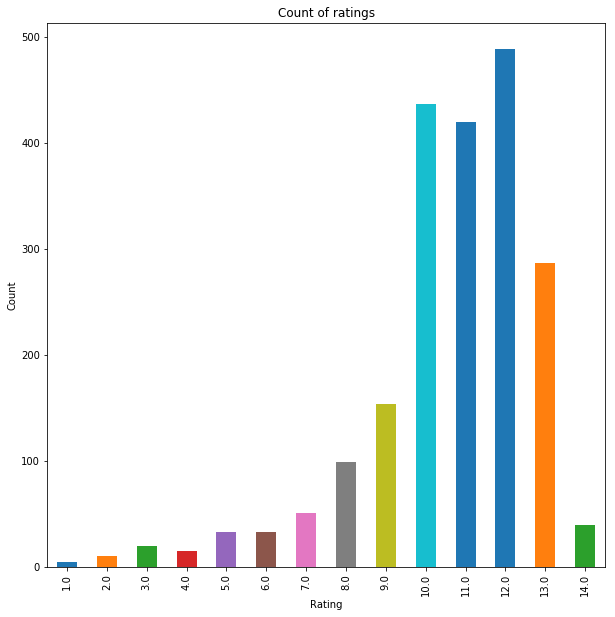

In [49]:
tweet_archive_clean["rating_numerator"].round(decimals=0).value_counts().sort_index().plot(kind='bar', figsize=(10, 10));
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Count of ratings");

In [50]:
x = tweet_archive_clean["rating_numerator"].round(decimals=0).value_counts().sort_index() / tweet_archive_clean["rating_numerator"].value_counts().sum() *100
x

1.0      0.191388
2.0      0.478469
3.0      0.909091
4.0      0.717703
5.0      1.578947
6.0      1.578947
7.0      2.440191
8.0      4.736842
9.0      7.368421
10.0    20.909091
11.0    20.095694
12.0    23.397129
13.0    13.732057
14.0     1.866029
Name: rating_numerator, dtype: float64

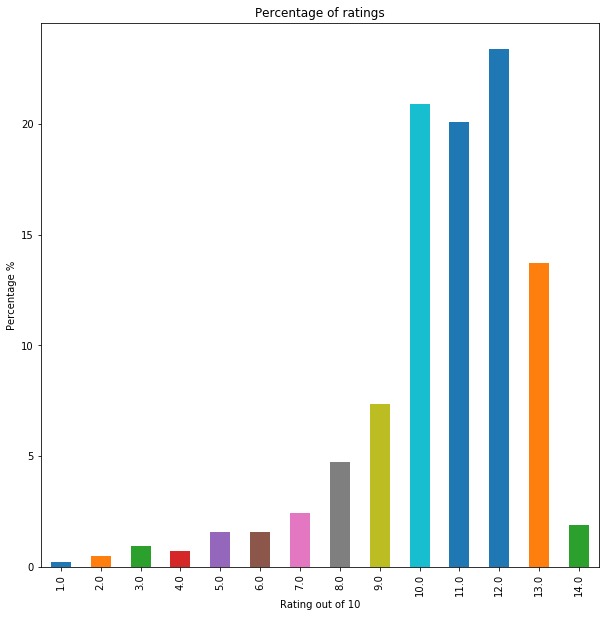

In [63]:
x.plot(kind='bar', figsize=(10, 10))
plt.xlabel("Rating out of 10")
plt.ylabel("Percentage %")
plt.title("Percentage of ratings");

In [52]:
tweet_archive_clean.stage.value_counts() / tweet_archive_clean.stage.value_counts().sum() *100

pupper     68.358209
doggo      21.492537
puppo       7.164179
floofer     2.985075
Name: stage, dtype: float64

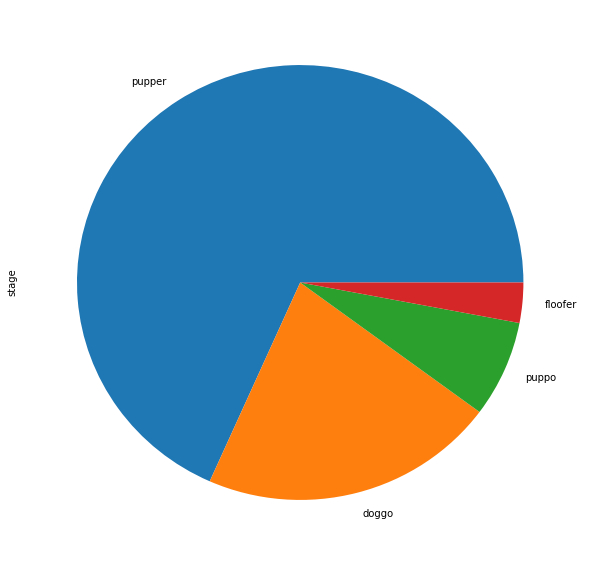

In [53]:
tweet_archive_clean.stage.value_counts().plot(kind='pie', figsize=(10, 10));

# - Draw conclusion

## 10 Most common dog names  (most to least)
1- Lucy

2- Cooper

3- Oliver

4- Penny

5- Tucker

6- Charlie

7- Bo

8- Bella

9- Oscar

10- Lola



## 10 Most common breeds (most to least)
1- golden_retriever

2- Labrador_retriever

3- Pembroke

4- Chihuahua

5- pug

6- toy_poodle

7- chow

8- Samoyed

9- Pomeranian

10- malamute

## 10 Most favoured breeds (By Average favourite)
1- Saluki                     24060.000000

2- Bedlington_terrier         21153.166667

3- French_bulldog             18416.806452

4- Bouvier_des_Flandres       18032.000000

5- Afghan_hound               17326.666667

6- black-and-tan_coonhound    17012.000000

7- flat-coated_retriever      16791.625000

8- Irish_water_spaniel        16400.000000

9- Leonberg                   14934.333333

10- English_springer           14138.300000


## 10 Most retweeted breeds (by average retweet)

1- Bedlington_terrier    7510.166667

2- Afghan_hound          5976.000000

3- standard_poodle       5508.909091

4- English_springer      5401.600000

5- Saluki                5133.750000

6- French_bulldog        5039.677419

7- cocker_spaniel        4858.100000

8- Samoyed               4843.952381

9- whippet               4840.272727

10- Great_Pyrenees        4533.866667

## Most favoured and retweeted stages (Most to least)

1- puppo

2- doggo

3- floofer

4- pupper

# - Communicate

`wrangle_report.pdf` and `act_report.pdf` were uploaded to notebook folder